In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: ___Eylen Adriana Martínez Medrano

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [21]:
 # Aquí va su código

f = lambda x: 3**x
valores_h= []
valores_h.append(0.1)
def derivada(x):
    h = 0.1
    nuevo = (f(x + h) - f(x-h))/(2*h)
    anterior = 0
    while abs(anterior - nuevo) < 1e-8:
         h = h/2
         valores_h.append(h)
         anterior = (f(x + h) - f(x-h))/(2*h)
         nuevo = anterior
    return derivada,valores_h

#b
#NO es mucho pero es trabajo honesto :(

(<function __main__.derivada(x)>, [0.1])

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



TypeError: can't multiply sequence by non-int of type 'float'

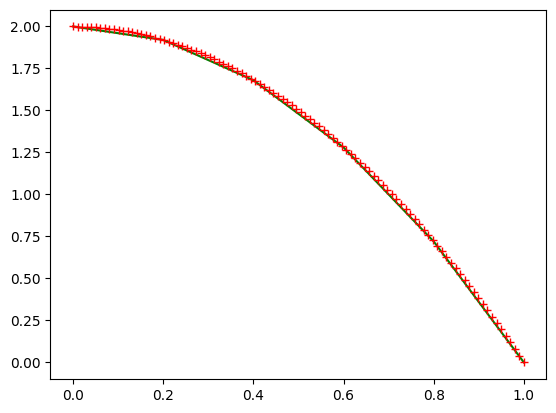

In [63]:
from scipy.interpolate import lagrange, CubicSpline

# Aquí va su código
radios = np.array([0.0,0.2,0.4,0.6,0.8,1])
velocidad = np.array([2,1.92,1.68,1.28,0.72,0.0])
#encuentro el polinomio de lagrange con scipy
p_lagrange = lagrange(radios, velocidad)
#encuentro el spline cúbico con scipy
p_cubico = CubicSpline(radios, velocidad)
#genero los puntos en x
x = np.linspace(0,1,100)
#genero el grafico
plt.plot(radios, velocidad, color = 'green')
plt.plot(x,p_cubico(x),'+', color = 'red')
plt.grid
plt.legend
plt.show
#gradiente
gradiente = np.gradient(p_cubico,1)
#esfuerzo cortante



In [59]:
plt.legend?


# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [51]:


#a
def integral_z(y,x):
    integrando = lambda z: z*y*x #Defino una función de z porque es la primera variable a integral
    res,_ =quad(integrando,0, 1-x-y)
    return res #Solo tomo el valor de la integral
def integral_y(x):
    integrando = lambda y: integral_z(x,y) #Ahora una función de Y que quede en terminos de x
    res,_ = quad(integrando,0,1-x)
    return res #Solo tomo el valor de la integral
integral, error = quad(integral_y, 0,1)
print('Resultado de la integral')
print(integral,error)
f = lambda z,y,x: x*y*z
a,b = 0,1
g, h = lambda x: 0, lambda x: 1-x
r,q = lambda x,y: 0, lambda x,y: 1-x-y
tplquad(f,a,b,g,h,r,q)
#momento de inercia para x
print('Moimento de inercia para x')
F = lambda z,y,x: (x**2 + y**2)*(x*y*z)
a,b = 0,1
g, h = lambda x: 0, lambda x: 1-x
r,q = lambda x,y: 0, lambda x,y: 1-x-y
print(tplquad(F,a,b,g,h,r,q))
#momento de inercia para z
print('Moimento de inercia para z')
G = lambda z,y,x: (z**2 + y**2)*(x*y*z)
a,b = 0,1
g, h = lambda x: 0, lambda x: 1-x
r,q = lambda x,y: 0, lambda x,y: 1-x-y
tplquad(G,a,b,g,h,r,q)

Resultado de la integral
0.0013888888888888887 1.541976423090495e-17
Moimento de inercia para x
(0.00029761904761904765, 1.5209675643109918e-17)
Moimento de inercia para z


(0.00029761904761904765, 1.8329816156081302e-17)

In [5]:
quad?
